In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft, fftfreq
from scipy.stats import iqr

In [56]:
data = loadmat('BFVdata_assignment3.mat')

In [57]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'BFV_Fs', 'BFVdu'])

In [58]:
BFVdu = data['BFVdu'].flatten()
BFV_Fs = data['BFV_Fs'].flatten()[0]

In [59]:
pd.Series(BFVdu).describe()

count    1000.000000
mean        0.521637
std         0.061287
min         0.451000
25%         0.483176
50%         0.495459
75%         0.538815
max         0.722000
dtype: float64

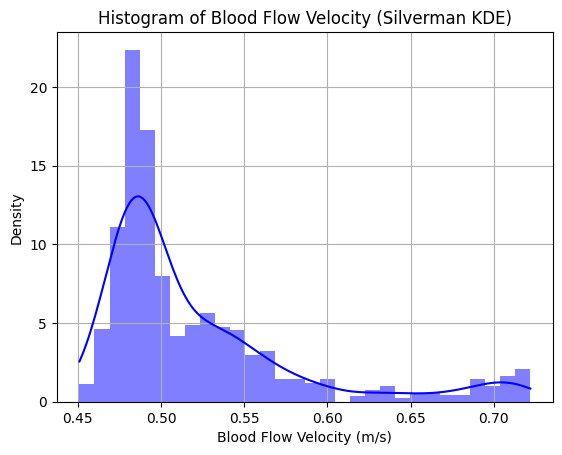

In [64]:
sns.histplot(BFVdu, kde=True, bins=30, color='blue', stat='density', linewidth=0)
plt.title("Histogram of Blood Flow Velocity (Silverman KDE)")
plt.xlabel("Blood Flow Velocity (m/s)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

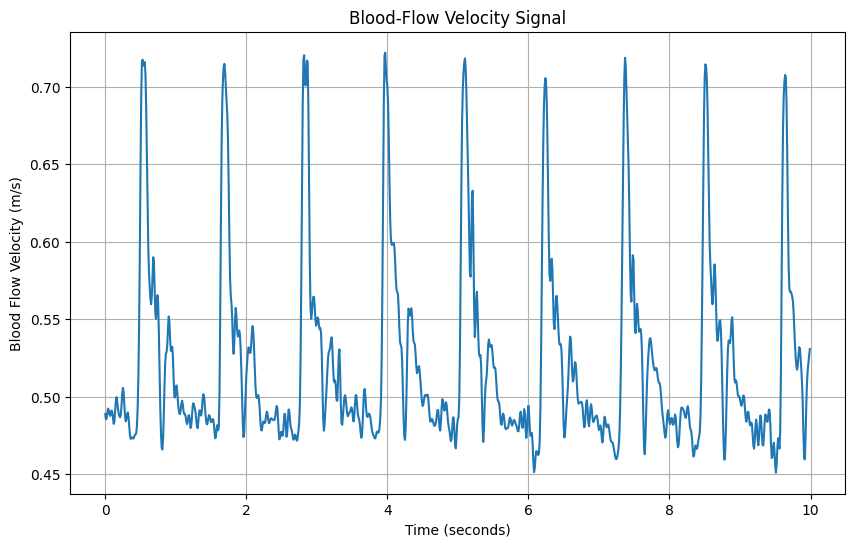

In [45]:
# Plot the blood-flow velocity signal
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(BFVdu)) / BFV_Fs, BFVdu)  # Time axis based on sampling rate
plt.title("Blood-Flow Velocity Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Flow Velocity (m/s)")
plt.grid(True)
plt.show()

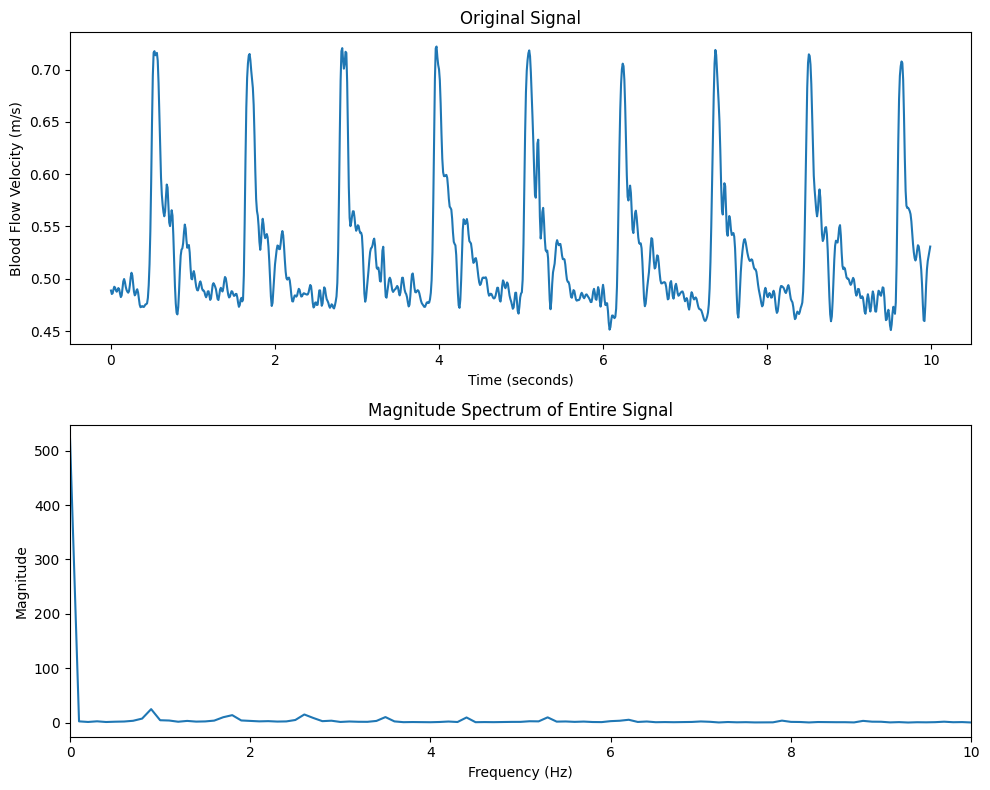

In [83]:
N = len(BFVdu)
t = np.arange(0, N) / BFV_Fs

fft_BFVdu = fft(BFVdu)
frequencies = fftfreq(len(BFVdu), 1 / BFV_Fs)
magnitude_BFVdu = np.abs(fft_BFVdu)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, BFVdu)
plt.title("Original Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Flow Velocity (m/s)")

plt.subplot(2, 1, 2)
plt.plot(frequencies[:N // 2], magnitude_BFVdu[:N // 2])
plt.title("Magnitude Spectrum of Entire Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

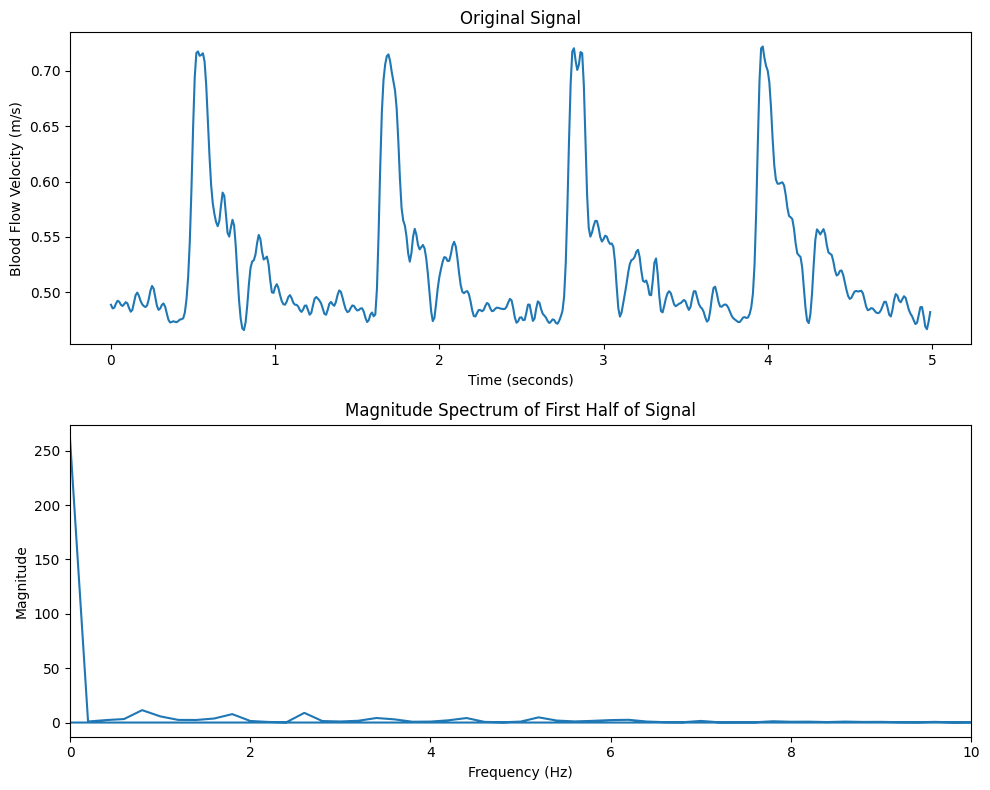

In [82]:
fft_BFVdu = fft(BFVdu[:N // 2])
frequencies = fftfreq(len(BFVdu[:N // 2]), 1 / BFV_Fs)
magnitude_BFVdu = np.abs(fft_BFVdu)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t[:N // 2], BFVdu[:N // 2])
plt.title("Original Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Flow Velocity (m/s)")

plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude_BFVdu)
plt.title("Magnitude Spectrum of First Half of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

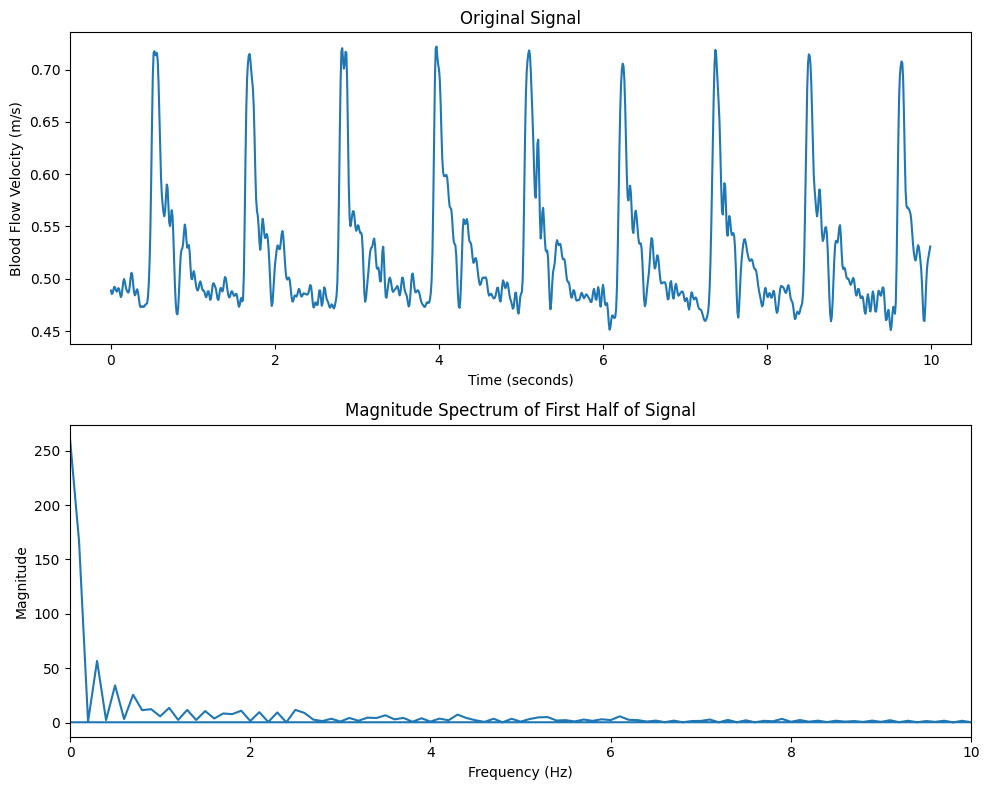

In [86]:
# Compute FFT for the first half of the signal with zero-padding
padded_BFVdu = np.concatenate((BFVdu[:N // 2], np.zeros(N // 2)))
fft_BFVdu = fft(padded_BFVdu)
frequencies = fftfreq(len(padded_BFVdu), 1 / BFV_Fs)
magnitude_BFVdu = np.abs(fft_BFVdu)

plt.figure(figsize=(10, 8))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, BFVdu, linewidth=1.5)
plt.title("Original Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Flow Velocity (m/s)")

# Plot the magnitude spectrum of the first half of the signal
plt.subplot(2, 1, 2)
plt.plot(frequencies[:N], magnitude_BFVdu[:N], linewidth=1.5)
plt.title("Magnitude Spectrum of First Half of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 10)

plt.tight_layout()
plt.show()